Dados de treino e de teste
==========================



## Pergunta



Imagine que você fez todo o processo de coletar dados e treinar um modelo de *machine learning* supervisionado. Agora que você tem um modelo em mãos você pode usar ele para fazer previsões! 🎉 Digamos que você fez um modelo que recebe como entrada a temperatura, umidade do ar e dia do ano e retorna o quanto de chuva vai cair na cidade de Piracicaba no dia do ano escolhido.

A pergunta agora é: como que você faz pra saber se seu modelo é um *bom modelo*?



## O que é um bom modelo?



Antes de seguir em frente, é importantíssimo que esteja claro o que é considerado um *bom modelo*. Um bom modelo é aquele que tem um balanço aceitável entre viés e variância e por conta disso é capaz de prever suficientemente bem o *target* de interesse.

Um modelo com alta variância e baixo viés está <u>sobreajustado</u> aos dados (também conhecido como *overfitting*). Ele descreve muito bem os dados que conhece, porém erra muito quando tenta prever dados que nunca viu.

Um modelo com baixa variância e alto viés está <u>subajustado</u> aos dados (também conhecido como *underfitting*). Ele não consegue descrever bem os dados que conhece e também erra muito quando tenta prever dados que nunca viu.

Um modelo com um balanço aceitável entre viés e variância é um modelo que consegue descrever razoavelmente bem os dados que conhece e também acerta razoavelmente bem quando tenta prever dados que nunca viu. É este o tipo de modelo que consideramos um *bom modelo*!

Não deixe de ver esse [excelente vídeo](https://www.youtube.com/watch?v=EuBBz3bI-aA) do StatQuest para visualizar o conceito acima. Veja também abaixo outro exemplo para visualizar o conceito (adaptado de: [https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html](https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html))



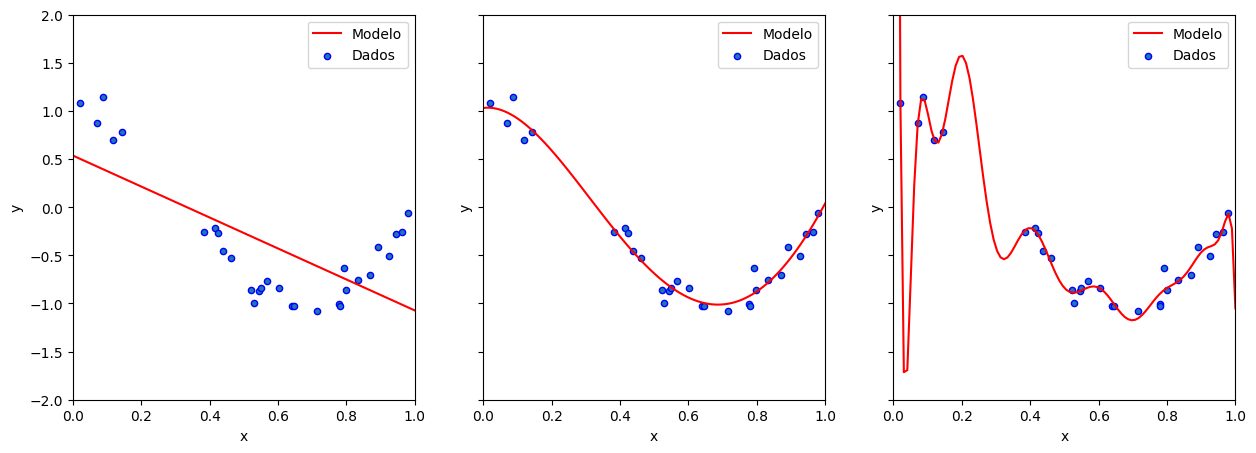

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

np.random.seed(0)  # fixando a semente para os sorteios aleatórios

NUM_PONTOS = 30
COMPLEXIDADE_DOS_MODELOS = [1, 4, 15]


def funcao_verdadeira(X):
    """Esta é a nossa função verdadeira que queremos descobrir/modelar."""
    return np.cos(1.5 * np.pi * X)


# criando os dados sintéticos
X = np.sort(np.random.rand(NUM_PONTOS))
y = funcao_verdadeira(X) + np.random.randn(NUM_PONTOS) * 0.1

X_continuo = np.linspace(0, 1, 100)

fig, axes = plt.subplots(
    ncols=3,
    nrows=1,
    figsize=(len(COMPLEXIDADE_DOS_MODELOS) * 5, 5),
    sharey=True,
)

for i in range(len(COMPLEXIDADE_DOS_MODELOS)):

    eixo = axes[i]

    # Este bloco cria o pipeline do modelo que será ajustado
    polynomial_features = PolynomialFeatures(
        degree=COMPLEXIDADE_DOS_MODELOS[i], include_bias=False
    )
    linear_regression = LinearRegression()
    pipeline = Pipeline(
        [
            ("features_polinomiais", polynomial_features),
            ("regressao_linear", linear_regression),
        ]
    )
    pipeline.fit(X[:, np.newaxis], y)

    # Plotando!
    eixo.plot(
        X_continuo,
        pipeline.predict(X_continuo[:, np.newaxis]),
        label="Modelo",
        color="r",
    )
    eixo.scatter(X, y, edgecolor="b", s=20, label="Dados")

    # Configurando o plot
    eixo.set_xlabel("x")
    eixo.set_ylabel("y")
    eixo.set_xlim((0, 1))
    eixo.set_ylim((-2, 2))
    eixo.legend()

plt.show()

## Estratégia para conseguir um bom modelo usando machine learning



Observe que usamos os termos &ldquo;dados que o modelo conhece&rdquo; e &ldquo;dados que o modelo não conhece&rdquo; na seção acima. Vamos defini-los:

-   Dados que o modelo conhece são os dados que o modelo teve acesso (direta ou indiretamente!) durante seu processo de treino. O processo de treino de um modelo é o momento em que ele é capaz de alterar seus parâmetros internos.

-   Dados que o modelo não conhece é o conjunto de todos os dados menos os dados que o modelo conhece. Como estes dados não estavam disponíveis durante o processo de treino do modelo, eles não influenciaram de forma alguma os parâmetros internos do modelo.

Tendo em vista tudo que foi discutido, vamos finalmente ver uma estratégia para tentar obter um bom modelo usando machine learning. Trata-se da <u>estratégia de holdout</u>.

Esta estratégia é relativamente simples, ela consiste em reservar uma fração dos dados que temos e usar apenas o restante para o treino do nosso modelo. Após o treino, nós tentamos prever os dados que reservamos e, com isso, checamos se nosso modelo tem uma performance razoável quando tenta prever dados que não conhece.

Ao conjunto de dados reservados, que não serão utilizados para o treino do modelo, damos o nome de dados de teste ou dados *holdout*.

Ao conjunto de dados que usamos para treinar o modelo damos o nome de dados de treino.

Existem diversas estratégias para tentar encontrar bons modelos de machine learning. Algumas estratégias podem subdividir os dados que nós aqui chamamos de treino. Um exemplo bastante usual é quando trabalhamos com redes neurais artificiais, onde o conjunto que nós aqui chamamos de treino é dividido em um conjunto chamado de treino e um conjunto chamado de validação. Outro exemplo é quando fazemos um processo chamado de validação cruzada, onde podemos inclusive subdividir os dados que nós aqui chamamos de treino em um conjunto de dados de treino, validação e teste local!

Vamos combinar assim: você não se preocupa com isso agora, e em contrapartida também não irá se surpreender negativamente no futuro quando as coisas complicarem um pouquinho mais, OK?



## A função `train_test_split`



Para dividir um conjunto de dados em treino e teste temos a excelente função `train_test_split` do módulo `scikit-learn`.

Aqui nós veremos como usar essa função em conjunto com um DataFrame de `pandas`. No entanto, usualmente na documentação oficial e nos tutoriais online você verá esta função sendo usada com arrays de `numpy`.

Vamos primeiramente criar nosso DataFrame. Aqui usaremos novamente o conjunto de dados sobre diamantes.



In [2]:
import seaborn as sns

df = sns.load_dataset('diamonds')
print(df)

       carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]


Para usar a função `train_test_split`, precisamos definir quanto dos dados vamos reservar para o conjunto de teste. Aqui podemos escolher uma porcentagem (algo entre 10% a 25% costuma ser usualmente utilizado) ou um número absoluto de exemplos que irão compor o conjunto de teste. Essa é uma escolha importante! Se tivermos poucos dados no conjunto de teste não teremos muita confiança na performance do nosso modelo (afinal, ele pode se sair bem por pura sorte!). Se tivermos muitos dados no conjunto de teste, nós &ldquo;perdemos&rdquo; dados que poderíamos usar para treinar nosso modelo (o que deixará mais difícil o processo de encontrar um bom modelo).

Para este exemplo escolhemos reservar 10% dos dados para o conjunto de teste. Para fazer isso, iremos passar o valor `0.1` para o argumento `test_size`. Se quiséssemos 20% deveríamos passar o valor `0.2` para este argumento. Se quiséssemos reservar exatamente 150 exemplos, deveríamos passar o valor `150` para este argumento.



In [3]:
from sklearn.model_selection import train_test_split

TAMANHO_TESTE = 0.1

indices = df.index
indices_treino, indices_teste = train_test_split(
    indices, test_size=TAMANHO_TESTE
)

df_treino = df.loc[indices_treino]
df_teste = df.loc[indices_teste]

print(df_treino)
print()
print(df_teste)

       carat        cut color clarity  depth  table  price     x     y     z
53583   0.75  Very Good     E     SI1   63.4   57.0   2698  5.77  5.75  3.65
29308   0.25      Ideal     G     VS1   62.7   54.0    438  4.05  4.08  2.55
25034   0.40      Ideal     J     VS1   60.4   56.0    641  4.77  4.80  2.89
14099   1.00  Very Good     E     SI1   59.2   59.0   5718  6.49  6.55  3.86
2396    0.32    Premium     G     VS2   61.2   59.0    561  4.38  4.41  2.69
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
40133   0.41    Premium     H    VVS1   60.4   58.0   1115  4.85  4.79  2.91
23647   1.52  Very Good     H     VS2   59.7   55.0  11681  7.45  7.42  4.44
50624   0.30      Ideal     E     SI2   62.1   55.0    401  4.30  4.33  2.68
5795    1.00  Very Good     F     SI2   61.9   59.0   3906  6.39  6.44  3.97
14505   1.00  Very Good     G     VS2   61.5   58.0   5860  6.36  6.39  3.92

[48546 rows x 10 columns]

       carat        cut color clarity  depth  ta

No código acima nós usamos a função `train_test_split` para separar os índices do nosso DataFrame. Lembre-se que os índices são <u>identificadores únicos</u> de cada exemplo do nosso conjunto de dados, logo podemos recuperar esses exemplos usando o método `loc` do DataFrame.

Cada vez que você rodar o código acima você irá obter um conjunto de teste e treino diferentes. Isso ocorre pois a função `train_test_split` faz um sorteio (pseudo)-aleatório dos dados que recebe.

Em geral, quando estamos tratando da estratégia de *holdout*, nós queremos que o conjunto de dados reservados seja sorteado aleatoriamente, porém que seja *sempre o mesmo*. Para resolver isso, basta passar um número inteiro positivo qualquer para o argumento `random_state` e você terá garantia de que seu conjunto de treino e teste serão sempre os mesmos.



In [4]:
TAMANHO_TESTE = 0.1
SEMENTE_ALEATORIA = 61455

indices = df.index
indices_treino, indices_teste = train_test_split(
    indices, test_size=TAMANHO_TESTE, random_state=SEMENTE_ALEATORIA
)

df_treino = df.loc[indices_treino]
df_teste = df.loc[indices_teste]

print(df_treino)
print()
print(df_teste)

       carat        cut color clarity  depth  table  price     x     y     z
44301   0.53  Very Good     F     VS2   63.2   58.0   1578  5.13  5.16  3.25
43393   0.50      Ideal     I     VS2   61.9   56.0   1410  5.08  5.13  3.16
40359   0.43      Ideal     D     VS2   60.7   57.0   1129  4.91  4.88  2.97
24653   1.70    Premium     H     VS2   62.8   58.0  12992  7.57  7.52  4.74
25764   2.03       Good     H     SI2   59.6   61.0  14720  8.16  8.21  4.88
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
6321    1.11  Very Good     H     SI2   63.4   55.0   4028  6.54  6.51  4.14
12691   0.26  Very Good     E    VVS2   61.7   60.0    599  4.11  4.12  2.54
2256    0.77  Very Good     H     VS1   62.2   57.0   3152  5.81  5.86  3.63
27056   0.28    Premium     H    VVS1   61.5   58.0    646  4.22  4.17  2.58
30321   0.36      Ideal     H    VVS2   62.3   57.0    726  4.52  4.57  2.83

[48546 rows x 10 columns]

       carat        cut color clarity  depth  ta

Pode rodar a célula anterior quantas vezes quiser, ela irá sempre retornar o mesmo conjunto de treino e teste!

